In [ ]:
from pathlib import Path
from matplotlib.font_manager import fontManager
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
rng=np.random.default_rng(seed=42)
import tensorflow as tf
from  tensorflow.keras import *
tf.keras.losses.sparse_categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
tf.keras.regularizers.l1

In [13]:

inpDir=Path('..')/'..'/'input'

outDir=Path('..')/'output'

RANDOM_SATE=42
np.random.seed(RANDOM_SATE)
rng=np.random.default_rng(seed=RANDOM_SATE)


In [27]:
df=pd.read_csv(r"D:\sharefolder\Datasets\wine.csv")
df.head()

,Class,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [40]:
labels=df[df.columns[0]]
features_df=df.drop('Class',axis=1)
features_df.shape,labels.shape

((178, 13), (178,))

In [41]:
X_train,X_test,y_train,y_test=train_test_split(features_df,labels,test_size=0.20,random_state=RANDOM_SATE,stratify=labels)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [42]:
from matplotlib import scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

le=LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [47]:
from sklearn import metrics
import tensorflow


model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(8,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(3),

])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],)

In [48]:
earlystop=EarlyStopping(monitor='val_loss',mode='min',patience=6,verbose=1,restore_best_weights=True)
print('Model Compiler Successfully!')

history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,callbacks=[earlystop])

Model Compiler Successfully!
Epoch 1/100


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.4085 - loss: 0.9972 - val_accuracy: 0.4444 - val_loss: 1.0079
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4155 - loss: 0.9723 - val_accuracy: 0.4444 - val_loss: 0.9827
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4225 - loss: 0.9480 - val_accuracy: 0.4444 - val_loss: 0.9600
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4366 - loss: 0.9263 - val_accuracy: 0.4444 - val_loss: 0.9380
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4366 - loss: 0.9042 - val_accuracy: 0.4444 - val_loss: 0.9171
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4437 - loss: 0.8827 - val_accuracy: 0.4722 - val_loss: 0.8974
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4648 - loss: 0.8633 - val_accuracy: 0.5000 - val_loss: 0.8781
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4859 - loss: 0.8437 - val_accuracy: 0.5000 - val_loss: 0.8595
Epoc

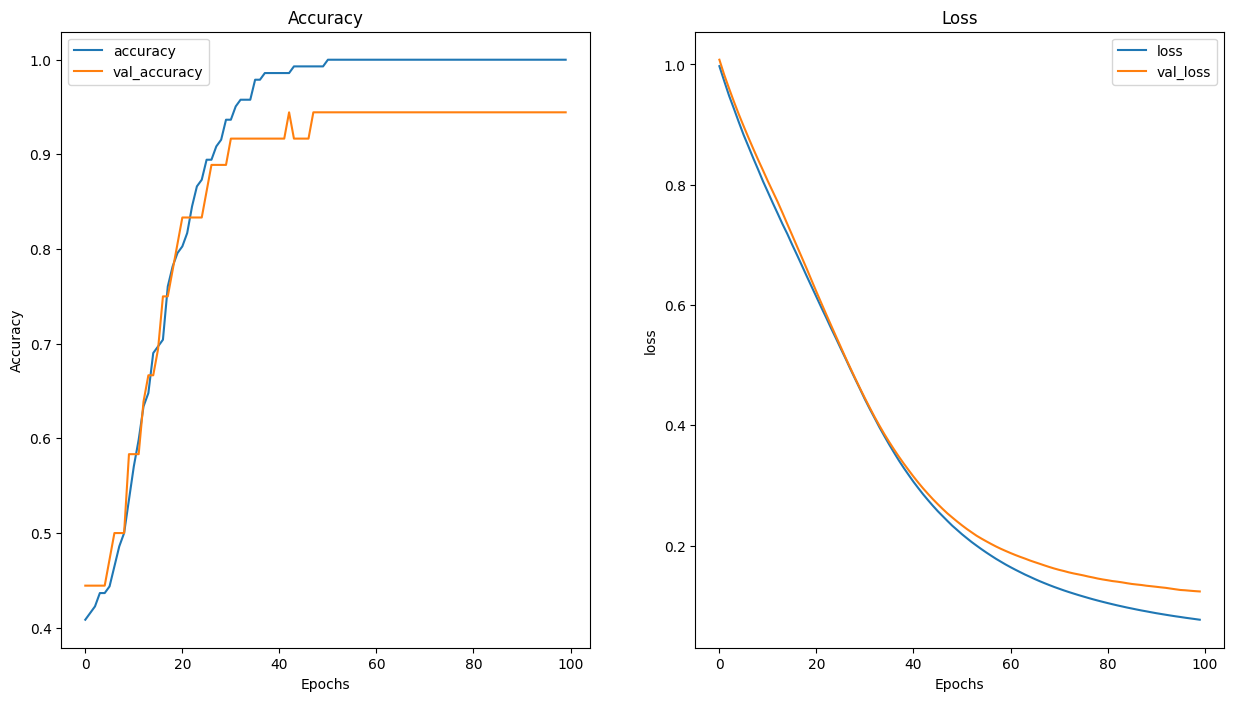

In [49]:
fig,ax = plt.subplots(1,2,figsize=(15,8))
ax[0].plot(history.epoch,history.history['accuracy'],label='accuracy')
ax[0].plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
ax[0].set_title('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(history.epoch,history.history['loss'],label='loss')
ax[1].plot(history.epoch,history.history['val_loss'],label='val_loss')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('loss')
ax[1].legend()

plt.show()

In [46]:
tf.keras.layers.Dense?


Init signature:
tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    lora_rank=None,
    lora_alpha=None,
    **kwargs,
)
Docstring:     
Just your regular densely-connected NN layer.

`Dense` implements the operation:
`output = activation(dot(input, kernel) + bias)`
where `activation` is the element-wise activation function
passed as the `activation` argument, `kernel` is a weights matrix
created by the layer, and `bias` is a bias vector created by the layer
(only applicable if `use_bias` is `True`).

Note: If the input to the layer has a rank greater than 2, `Dense`
computes the dot product between the `inputs` and the `kernel` along the
last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
For example, if input has dimensions `

In [5]:
model.fit?

Signature:
model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
)
Docstring:
Trains the model for a fixed number of epochs (dataset iterations).

Args:
    x: Input data. It can be:
        - A NumPy array (or array-like), or a list of arrays
        (in case the model has multiple inputs).
        - A backend-native tensor, or a list of tensors
        (in case the model has multiple inputs).
        - A dict mapping input names to the corresponding array/tensors,
        if the model has named inputs.
        - A `keras.utils.PyDataset` returning `(inputs, targets)` or
        `(inputs, targets, sample_weights)`.
        - A `tf.data.Dataset` yielding `(inputs, targets)` or
        `(in

Object `EarlyStopping` not found.
